In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df = df[df['ignore'] == False]
df['time_in_secs'] = df['time'].apply(lambda x: x.split(':')).apply(lambda x:int(x[0])* 3600 + int(x[1])* 60 + int(x[2]))

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('pace',axis=1,inplace=True)
df.drop('ignore',axis=1,inplace=True)

In [4]:
df[df.id == 5].count() > 1
from itertools import izip, cycle, tee

In [5]:
unique = df.id.unique.im_self
unique_list = unique.tolist()
more_than_one_run_ids = []

def ran_more_than_once():
    for elem, next_elem in zip(unique_list,unique_list[1:]):
        if elem == next_elem:
            more_than_one_run_ids.append(elem)

ran_more_than_once()

In [6]:
array = [] # this array is whether or not a specific id ran more than once or not
for id in df.id.tolist():
    if id in more_than_one_run_ids:
        array.append(True)
    else:
        array.append(False)

In [7]:
df['ran_more_than_once'] = array

In [8]:
#now filter out only the people that ran more than once
df_refined = df[df.ran_more_than_once == True]
# now remove the redundant ran_more_than_once column from the refined data
df_refined.drop('ran_more_than_once',axis=1,inplace=True)
df_refined.drop('time',axis=1,inplace=True)

/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
# now remove the redundant ran_more_than_once column from the refined data
df_refined.drop('name',axis=1,inplace=True)

/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
#now we need to figure out prev year and its corresponding next year
df_refined['prev_year'] = df_refined.year - df_refined.years_since_run
#df_refined.drop('prev year',axis=1,inplace=True)

/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
prev_year_list = df_refined.prev_year.tolist()
years_since_run_list = df_refined.years_since_run.tolist()

In [12]:
for i,(year,year_since_run) in enumerate(zip(prev_year_list,years_since_run_list)):
    if year_since_run == -1:
        prev_year_list[i] = -1

In [13]:
df_refined.prev_year = prev_year_list

/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
df_lr = df_refined

In [206]:
curr_id_list = df_refined.id.tolist()
index_list = df_refined.index.tolist()
hier_index = list(zip(curr_id_list,index_list))
hier_index = pd.MultiIndex.from_tuples(hier_index)
df_lr.set_index(hier_index,inplace=True)
df_lr.index.names = ['unique_id','(id,index)']
df_lr.head()

id  age  rank  year  male  run_count  years_since_run  \
unique_id (id,index)                                                          
4         3            4   35   670  2015     1          0               -1   
          4            4   35  2390  2016     1          1                1   
5         5            5   40  2608  2016     0          8                2   
          6            5   42  3086  2014     0          7                2   
          7            5   38  2455  2010     0          4                1   

                      time_in_secs prev_year  
unique_id (id,index)                          
4         3                  13977    ignore  
          4                  18810      2015  
5         5                  19714      2014  
          6                  20594      2012  
          7                  19744      2009

SyntaxError: invalid syntax (<ipython-input-207-c725430d9885>, line 1)

In [31]:
df_lr.irow(1).id

/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  if __name__ == '__main__':


4

In [64]:
df_lr.xs(5).icol(3)

/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  if __name__ == '__main__':


(id,index)
5     2016
6     2014
7     2010
8     2008
9     2009
10    2007
11    2011
12    2006
13    2012
Name: year, dtype: int64

In [15]:
df_lr.set_index('year',inplace=True)

In [29]:
#this command should give you the corresponding prev year time insecs used in df
df_lr.to_csv('example2.csv')

In [101]:
df_lr = pd.read_csv('example2.csv')

In [102]:
df_lr[df_lr.id > 1120]
df_lr.set_index('year',inplace=True)
df_lr.xs(2015)[df_lr.xs(2015).id == 4].time_in_secs.values[0]

13977

In [103]:
id_list = []
age_list = []
male_list = []
time_prev_run_list = []
run_count_list = []
delta_year_list = []
time_next_run_list = []
run_year_list = []

prev_year_list = df_lr.prev_year.tolist()
curr_id_list = df_lr.id.tolist()
curr_age_list = df_lr.age.tolist()
gender_list = df_lr.male.tolist()
time_in_secs_list = df_lr.time_in_secs.tolist()
curr_run_count_list = df_lr.run_count.tolist()
year_list = df_lr.index.tolist()

In [104]:
df_lr.xs(2015)[df_lr.xs(2015).id == 4].time_in_secs.values[0]
print(type(year_list[0]))

<type 'numpy.int64'>


In [105]:
for prev_year,idx,age,male,run_count,year,time_in_secs in zip(prev_year_list,curr_id_list,curr_age_list,gender_list,curr_run_count_list,year_list,time_in_secs_list):
    #iterate df to find ids with year = prev-year and matching id
    if prev_year != -1 :
        print("----")
        print(prev_year)
        print(type(prev_year))
        print(idx)
        print("----")
        time_in_prev = df_lr.xs(prev_year)[df_lr.xs(prev_year).id == idx].time_in_secs.values[0]
        id_list.append(idx)
        age_list.append(age)
        male_list.append(male)
        time_prev_run_list.append(time_in_prev)
        run_count_list.append(run_count)
        run_year_list.append(year)
        delta_year_list.append(year - prev_year)
        time_next_run_list.append(time_in_secs)

----
2015
<type 'int'>
4
----
----
2014
<type 'int'>
5
----
----
2012
<type 'int'>
5
----
----
2009
<type 'int'>
5
----
----
2007
<type 'int'>
5
----
----
2008
<type 'int'>
5
----
----
2006
<type 'int'>
5
----
----
2010
<type 'int'>
5
----
----
2011
<type 'int'>
5
----
----
2014
<type 'int'>
7
----
----
2012
<type 'int'>
9
----
----
2014
<type 'int'>
9
----
----
2015
<type 'int'>
9
----
----
2014
<type 'int'>
11
----
----
2015
<type 'int'>
11
----
----
2016
<type 'int'>
12
----
----
2015
<type 'int'>
15
----
----
2012
<type 'int'>
15
----
----
2011
<type 'int'>
15
----
----
2008
<type 'int'>
15
----
----
2012
<type 'int'>
16
----
----
2011
<type 'int'>
16
----
----
2010
<type 'int'>
16
----
----
2009
<type 'int'>
16
----
----
2015
<type 'int'>
16
----
----
2015
<type 'int'>
18
----
----
2011
<type 'int'>
22
----
----
2015
<type 'int'>
23
----
----
2015
<type 'int'>
31
----
----
2011
<type 'int'>
32
----
----
2015
<type 'int'>
37
----
----
2013
<type 'int'>
40
----
----
2014
<type 'int'

In [106]:
df_clean = pd.DataFrame(
    {'id': id_list,
     'age': age_list,
     'male': male_list,
     'time_prev': time_prev_run_list,
     'run_count':run_count_list,
     'delta_year': delta_year_list,
     'run_year':run_year_list,
     'time_next':time_next_run_list,
    })

In [107]:
df_clean

,age,delta_year,id,male,run_count,run_year,time_next,time_prev
0,35,1,4,1,1,2016,18810,13977
1,40,2,5,0,8,2016,19714,20594
2,42,2,5,0,7,2014,20594,19715
3,38,1,5,0,4,2010,19744,19647
4,36,1,5,0,2,2008,19729,19572
5,37,1,5,0,3,2009,19647,19729
6,35,1,5,0,1,2007,19572,19772
7,39,1,5,0,5,2011,19704,19744
8,40,1,5,0,6,2012,19715,19704
9,40,2,7,1,1,2016,12963,14683


In [108]:
#first the model was tested using sklearn linear regression to make sure the data made since 
#then a Linear regression model was built that yields pretty much the same resuts as sklearn was written (found below)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_clean[['age', 'male','run_count','time_prev']]
y = df_clean['time_next']
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 101)
lm  = LinearRegression()
lm.fit(X_train,y_train)
# create df out of coeffecients
cdf = pd.DataFrame(lm.coef_ , X_train.columns , columns = ['Coeff'])
#predict
predictions = lm.predict(X_test)
cdf

,Coeff
age,34.412997
male,-393.878626
run_count,51.935705
time_prev,0.741340


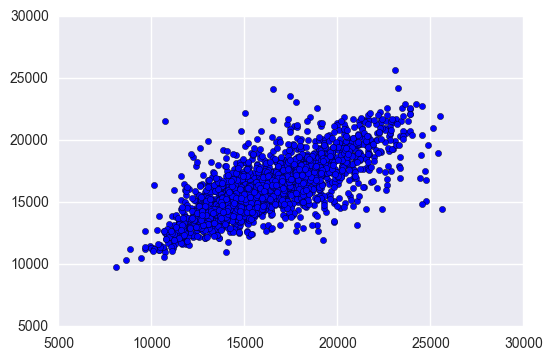

In [109]:
plt.scatter(y_test , predictions)

In [110]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 1374.4118432725086)
('MSE:', 3559288.2421365813)
('RMSE:', 1886.6076015262372)


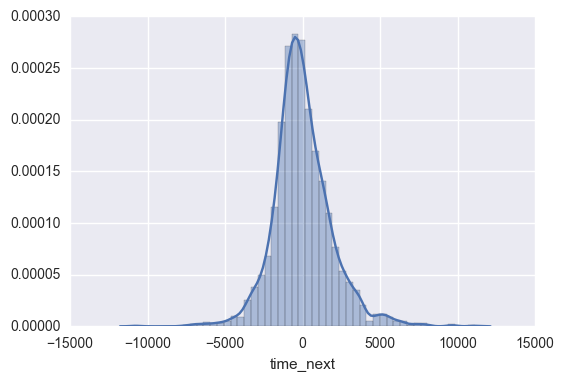

In [111]:
sns.distplot((y_test - predictions))

In [146]:
'''LINEAR REGRESSION''' ####################

'LINEAR REGRESSION'

In [152]:
#first we need to split our data into 70%:30% for cros validation
msk = np.random.rand(len(df_clean)) < 1.0
train_set = df_clean[msk]
test_set = df_clean[~msk]
#create a numpy array from data framework 
npdf_train = train_set.values
npdf_test = test_set.values

In [153]:
# output y is the number of secs it took for a participant to 
# finish his 'next' marathon (the one he would run eventually after a delta_year years since his last run) --> (time_next)
y_train = npdf_train[:,6]
y_test = npdf_test[:,6]

In [154]:
#the input matrix  X  
# with features (x1 = age, x2 = male, x3 = number of marathon participations, x4 = time in seconds recorded in this person's last run)
x_train = npdf_train[:,[0,3,4,7]]
x_test = npdf_test[:,[0,3,4,7]]

In [155]:
# varibles needed for the the linear regression equation 
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [157]:
#getting the pseudo inverse matrix of input matrix x  
xPI_train = np.linalg.pinv(x_train)

In [158]:
# the output y matrix 
y_train = y_train.astype(float)
y_test = y_train.astype(float)

In [159]:
#solving for the weights
w = np.dot(xPI_train, y)

In [160]:
#predicting 2017 performance using this data
# this is our predicted y's 
prediction2017 = np.dot(x_train, w)

In [161]:
# least square error/ average error calculator 
# you can use this compute the error between two column vector matricies 
def leastSquareErrorCalculator (xw, y):    
    sumOfDifference = 0 
    for i in range(len(y)):
        sumOfDifference += ((xw[i]-y[i])**2)/len(y)
    return sumOfDifference

In [162]:

leastSquareTrainingError = leastSquareErrorCalculator(prediction2017,y)


In [163]:
leastSquareTrainingError

3745015.4897518377

In [165]:
print('MAE:', metrics.mean_absolute_error(y_train, prediction2017))
print('MSE:', metrics.mean_squared_error(y_train, prediction2017))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, prediction2017)))

('MAE:', 1378.8385873953193)
('MSE:', 3745015.4897518507)
('RMSE:', 1935.2042501379153)
